# Probability

P(E) = 'The Probabilty of Event E'

$$
P(E, F) = P(E)P(F)
$$
Secara matematis E dan F didefinisikan seperti diatas jika independen. Jika event E tidak ada efek denggan F.
$$
P(E|F) = P(E,F)/P(F)
$$
Jika tidak independen maka probabilitas E kondisional terhadap F. (Kemungkinan Macet Jika Hujan)

Karena notasi kemungkinan kondisional diatas, maka kemungkinan terjadi bersamaan bisa dinotasikan seperti:
$$
P(E,F) = P(E|F)P(F)
$$
berdasarkan notasi diatas, Jika event independen maka dapat digambarkan seperti ini:
$$
P(E|F) = P(E)
$$
Menjelaskan bahwa even F tidak memberikan informasi apapun tentang even E.

In [25]:
import random
import datetime

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(datetime.datetime.now())
for _x in range(1000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1

print(f"p(both|older): {both_girls/older_girl}")
print(f"p(both|either): {both_girls/either_girl}")

p(both|older): 0.4656964656964657
p(both|either): 0.29906542056074764


/tmp/ipykernel_19779/1441969704.py:11: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.datetime.now())


### Bayes Theorem

Bayangkan kita perlu untuk mencari tahu probabilitas event E terhadap F, namun kita hanya memiliki probabilitas F terhadap E dan masing2 probabilitas.

untuk mendapatkan hasil kita bisa mencari melalui:

$$
P(E|F) = \frac{P(E,F)}{P(F)}
$$
Jika kita mengingat formula dibawah:
$$
P(E, F) = P(F|E)P(E)
$$
bayes theorem bisa dijelaskan secara sederhana sebagai notasi dibawah.
$$
P(E|F)=\frac{P(F|E)P(E)}{P(F)}
$$
Namun jika kita tidak mengetahui nilai P(F) kita juga dapat menggunakan formula dibawah:
$$
P(F) = P(F,E) + P (F, ¬E)
$$
Dengan ¬E sebagai Even E tidak terjadi. Kita bisa menggunakannya ke dalam bayes theorem menjadi
$$
P(E|F) = \frac{P(F|E)P(E)}{[P(F|E)P(E)] + P(F|¬E)P(¬E)}
$$

Membingunkan? memang?

Perhatikan contoh dibawah, bayangkan jika suatu penyakit menginfeksi 1 dari 10000 orang (P(D)/_pd). Lalu dibuat suatu test yang dimana tingkat keberhasilan tes tersebut adalah 99% (jika memang terinfeksi), (P(TD),_ptd). Maka berapa jumlah presentase seseorang terinfeksi jika di tes?


In [28]:
_ptd = 0.99 # chance of Someone who have the disease and tested postive
_pt_d = 0.01 # chance of Somene who have the disease and tested negative
_pd = 0.0001 # chance of Someone who have the disease
_p_d = 0.999 # chance of someone who doesn't

_pdt = _ptd * _pd / ((_ptd*_pd)+ (_pt_d*_p_d))
print(_pdt) #chance of someone who tested and are having the disease (positive)

0.009812667261373774


Memang hasilnya sangat minim ya dibawah 1% orang akan tes positif.

### Continous Distribution

(Please help with explanation)

In [ ]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1 : return x
    else: return 1

### Normal Distribution

The normal distiribution is the classic bell-curved shaped distribution. It's determine by μ (mu) and σ (sigma). The formula is show as below:

$$
f(x|μ, σ) = \frac{1}{2πσ} exp (-\frac{(x-μ2)^2}{2σ^2})
$$

as shown with the function below:

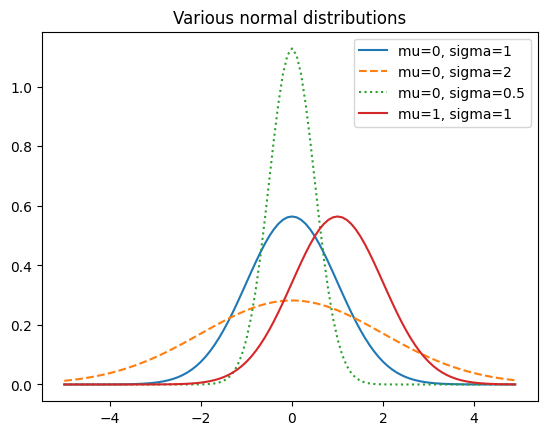

In [38]:
import math
from matplotlib import pyplot as plt

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=1, sigma=1) for x in xs], '-', label='mu=1, sigma=1')
plt.legend()
plt.title("Various normal distributions")

plt.show()

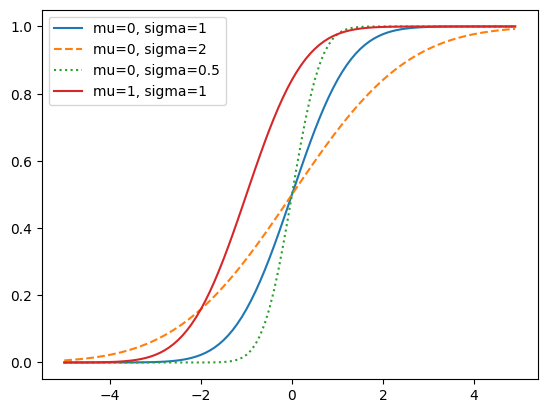

In [48]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1, sigma=1) for x in xs], '-', label='mu=1, sigma=1')

plt.legend()
plt.show()